# Practice pandas data manipulation

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1. Load the Mad Men cast show data into a pandas DataFrame

In [5]:
cast_data = '../assets/datasets/mad-men-cast-show-data.csv'

In [6]:
madmen = pd.read_csv(cast_data)

#### 2. Print the head and tail of the data

In [23]:
madmen.head()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,Lead,Support,Shows,Score,Score/Y,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,Lead,Support,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,Lead,Support,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,Lead,Support,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,Lead,Support,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,Lead,Support,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


#### 3. Print the columns of the data

In [19]:
colnames = madmen.columns.values

#### 4. Rename any columns with spaces or special characters to not have them

In [30]:
specialchars = ['$','&','%','#','?','/']
for col in colnames:
    if any([x in col for x in specialchars]):
        newcol = ''.join([x for x in col if x not in specialchars])
        print newcol
        madmen.rename(columns={col:newcol}, inplace=True)
madmen.head()

Status
ScoreY


,Performer,Show,Show Start,Show End,Status,CharEnd,Years Since,Lead,Support,Shows,Score,ScoreY,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,Lead,Support,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,Lead,Support,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,Lead,Support,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,Lead,Support,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,Lead,Support,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


In [33]:
colnames = madmen.columns.values
colnames_lower = {i:i.lower() for i in colnames}
print colnames_lower
madmen.rename(columns = colnames_lower, inplace = True)
madmen.head()

{'status': 'status', 'performer': 'performer', 'lead': 'lead', 'show': 'show', 'show start': 'show start', 'support': 'support', 'charend': 'charend', 'years since': 'years since', 'show end': 'show end', 'lead_notes': 'lead_notes', 'score': 'score', 'show_notes': 'show_notes', 'support_notes': 'support_notes', 'scorey': 'scorey', 'shows': 'shows'}


,performer,show,show start,show end,status,charend,years since,lead,support,shows,score,scorey,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,Lead,Support,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,Lead,Support,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,Lead,Support,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,Lead,Support,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,Lead,Support,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


#### 5. Subset the data where the status of the show is not "END" or "End"

In [47]:
madmen[madmen['status'] != any('END End')]

,performer,show,show start,show end,status,charend,years since,lead,support,shows,score,scorey,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,Lead,Support,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,Lead,Support,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,Lead,Support,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,Lead,Support,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,Lead,Support,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."
5,Camryn Manheim,The Practice,1997,2014,END,2004,11,Lead,Support,5,6.00,0.545454545,"The Hot Flashes, 2013","Twisted, 2004; Dark Water, 2005; An Unfinished...","The Gosts Whisperer, Season 2-5; Extant, Season 1"
6,Steve Harris,The Practice,1997,2014,END,2004,11,Lead,Support,3,3.50,0.318181818,NaN,"12 Rounds, 2009; Takers, 2010","Heist, Season 1; Awake, Season 1; Legends, Sea..."
7,Marla Sokoloff,The Practice,1997,2014,END,2004,11,Lead,Support,1,1.25,0.113636364,NaN,"Play The Game, 2009","Big Day, Season 1;"
8,Jerry Orbach,Law & Order,1990,2010,END,2004,11,Lead,Support,0,0.00,0,NaN,NaN,NaN
9,Michael Badalucco,The Practice,1997,2014,END,2004,11,Lead,Support,0,0.25,0.022727273,NaN,"Bewitched, 2005",NaN


#### 6. Print out the performers where the show start is greater than 2005 and the score is greater than 7.

In [67]:
# madmen['show start'].dtypes
madmen[(madmen['show start']) > 2005 & (madmen['score'] > 7)]
# madmen[madmen['score'] > 7]

,performer,show,show start,show end,status,charend,years since,lead,support,shows,score,scorey,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,Lead,Support,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,Lead,Support,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,Lead,Support,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,Lead,Support,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,Lead,Support,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."
5,Camryn Manheim,The Practice,1997,2014,END,2004,11,Lead,Support,5,6.00,0.545454545,"The Hot Flashes, 2013","Twisted, 2004; Dark Water, 2005; An Unfinished...","The Gosts Whisperer, Season 2-5; Extant, Season 1"
6,Steve Harris,The Practice,1997,2014,END,2004,11,Lead,Support,3,3.50,0.318181818,NaN,"12 Rounds, 2009; Takers, 2010","Heist, Season 1; Awake, Season 1; Legends, Sea..."
7,Marla Sokoloff,The Practice,1997,2014,END,2004,11,Lead,Support,1,1.25,0.113636364,NaN,"Play The Game, 2009","Big Day, Season 1;"
8,Jerry Orbach,Law & Order,1990,2010,END,2004,11,Lead,Support,0,0.00,0,NaN,NaN,NaN
9,Michael Badalucco,The Practice,1997,2014,END,2004,11,Lead,Support,0,0.25,0.022727273,NaN,"Bewitched, 2005",NaN


#### 7. Select the performer and show column for the 20th thru 25th LABELED row.

In [68]:
madmen.ix[20:25,['performer','show']]

,performer,show
20,Mary Steenburgen,Joan of Arcadia
21,Mathew St. Patrick,Six Feet Under
22,Michael Welch,Joan of Arcadia
23,Aaron Himelstein,Joan of Arcadia
24,Becky Wahlstrom,Joan of Arcadia
25,Chris Marquette,Joan of Arcadia


#### 8. Plot a histogram of score

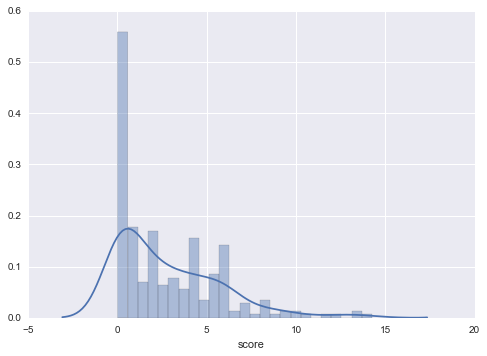

In [73]:
sns.distplot(madmen.score, 25)